**Winter 2019 Data Science Intern Challenge, being completed by Christopher Mills**

This document was prepared using a Jupyter Notebook.

**QUESTION 1**

In [1]:
# Start by importing a library for data handling, and then loading the data.
import pandas as pd
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")  # loads data
data.head()  # returns the column names and first 5 rows of the DataFrame, useful as examples

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [2]:
len(data)  # the number of rows in the dataset

5000

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

In [3]:
# It's a good idea to take a minute and recalculate the presented value, just incase of typos, etc.
data['order_amount'].mean()

3145.128

**a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

I suspect that there are one or more outliers pulling up the average. Looking at a plot is a fast way of testing this.

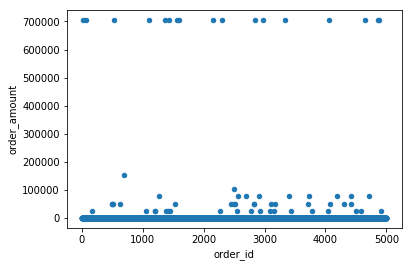

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(kind='scatter', x='order_id', y='order_amount')
plt.show()

Indeed there are numerous outliers with order amounts of roughly $700,000! Let's find out how many there are and if they all have the same value.

In [5]:
outliers = data[data['order_amount'] > 200000]  # filters out the small sales
print('Number of outliers:', len(outliers))

Number of outliers: 17


In [6]:
# There are 17 outliers in this 30-day period, so let's look at all of them.
outliers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [7]:
# They all have almost identical data. Does this shop only make these large sales?
shop_id_42 = data[data['shop_id'] == 42]  # filters out other shops
shop_id_42_other = shop_id_42[shop_id_42['order_amount'] < 704000]  # filters out the outliers
shop_id_42_other

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22


No, this shop also has many other, smaller orders to a variety of users. Regardless, **I would discuss reclassifying this shop as something other than a "normal sneaker shop" (since it is selling 2000 units at a time) and removing its transactions from this dataset. But as it stands now, there are 17 large bulk purchases of $704,000 and this explains why our average order value (AOV) is so surprisingly high.**

******************************
**b. What metric would you report for this dataset?**

**The answer to this question depends on the purpose of the reporting. I'm going to assume the purpose is to give an expectation of a typical order amount, in which case the median value should be an appropriate metric. But it is crucial that this not be reported as the AOV, which it is not.**

****************************
**c. What is its value?**

In [8]:
data['order_amount'].median()

284.0

**This median value for this 30-day window is $284.**

*******************************************************************************************
**Here are two alternatives, depending on how discussions of modifying the dataset went.**

**Alternative 1:** after discussion it was determined that shop 42's transactions should be removed from this dataset.

In [9]:
new_data = data[data['shop_id'] != 42]  # filters out shop 42
round(new_data['order_amount'].mean(), 2)

754.79

**Without the transactions of shop 42, the AOV is $754.79 and I report this.**

**Alternative 2:** after discussion it was determined that only the order amounts of $704,000 should be removed from this dataset.

In [10]:
new_data = data[data['order_amount'] < 704000]  # filters out the huge transactions
round(new_data['order_amount'].mean(), 2)

754.09

**Without the outlier transactions, the AOV is $754.09 and I report this.**

********************************
**QUESTION 2**

a. How many orders were shipped by Speedy Express in total?

SELECT * FROM Shippers;

-This reveals that Speedy Express has a ShipperID of 1.

SELECT COUNT(*) FROM Orders WHERE ShipperID = 1;

-This reveals that Speedy Express shipped **54 orders**.

*****************************************************
b. What is the last name of the employee with the most orders?

SELECT EmployeeID, COUNT(\*) FROM Orders  
GROUP BY EmployeeID ORDER BY COUNT(\*) DESC;

-This shows the count of records (in descending order) for each EmployeeID and reveals that the one with the most records is EmployeeID = 4.

SELECT LastName FROM Employees WHERE EmployeeID = 4;

-This reveals that the last name of the employee with the most orders is **Peacock**.

*************************************************
c. What product was ordered the most by customers in Germany?

-This is more complicated to answer so I'll build up a query in parts.

SELECT CustomerID FROM Customers WHERE Country = 'Germany';

-This gives all the relevent values of CustomerID.

SELECT OrderID FROM Orders WHERE CustomerID IN (  
    SELECT CustomerID FROM Customers WHERE Country = 'Germany');

-This gives all the relevent values of OrderID.

SELECT ProductID, Sum(Quantity) FROM OrderDetails WHERE OrderID IN (  
	SELECT OrderID FROM Orders WHERE CustomerID IN (  
    	SELECT CustomerID FROM Customers WHERE Country = 'Germany'))  
GROUP BY ProductID ORDER BY Sum(Quantity) DESC;

-This shows how many of each productID was ordered by customers in Germany (in descending order), revealing that ProductID = 40 was ordered the most.

SELECT ProductName FROM Products WHERE ProductID = 40;

-This reveals that **Boston Crab Meat** was ordered the most by customers in Germany.